In [39]:
# Dependencies
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data

import torchvision
from torchvision.transforms import Compose, ToTensor, Normalize

import torch.utils.tensorboard as tensorboard
from torchvision.utils import make_grid

%matplotlib inline
import matplotlib.pyplot as plt

/Users/eeshandhekane/Desktop/mila-studies/phd/dev/pytorch-examples/venv/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [40]:
# Define transforms.
train_transform = Compose([
    ToTensor(),
    Normalize(mean=(0.5, ), std=(0.5, )),
    # RandomCrop(size=(28, 28)),
])
test_transform = Compose([
    ToTensor(),
    Normalize(mean=(0.5, ), std=(0.5, ))
])

In [41]:
# Create datasets and loaders.
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data/', download=True, train=True, transform=train_transform, target_transform=None
)
train_loader = data.DataLoader(dataset=train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data/', download=True, train=False, transform=test_transform, target_transform=None
)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=8, shuffle=True, num_workers=2)
idx_to_class: dict = {
    0: 'T-Shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

In [42]:
for idx, batch in enumerate(train_loader):
    print('idx: {}'.format(idx))
    # print('batch:\n{}'.format(batch))
    print('batch type: {}'.format(type(batch)))
    print('batch first element type:\n\t{}\nshape:\n\t{}'.format(type(batch[0]), batch[0].shape))
    print('batch second element type:\n\t{} and shape:\n\t{}'.format(type(batch[1]), batch[1].shape))
    break

imgs, labels = next(iter(train_loader))

idx: 0
batch type: <class 'list'>
batch first element type:
	<class 'torch.Tensor'>
shape:
	torch.Size([8, 1, 28, 28])
batch second element type:
	<class 'torch.Tensor'> and shape:
	torch.Size([8])


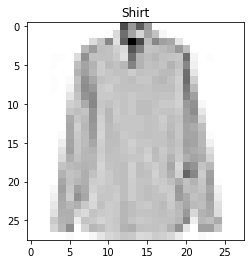

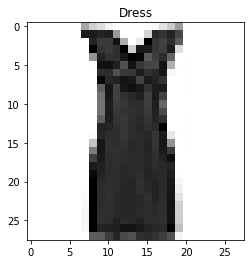

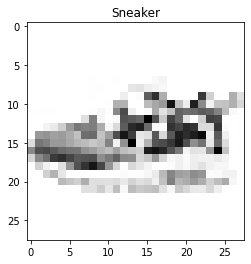

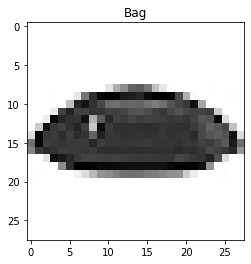

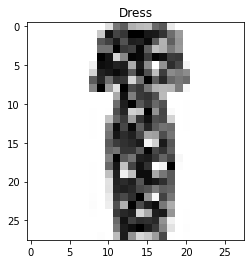

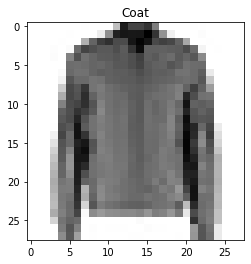

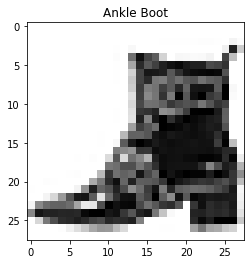

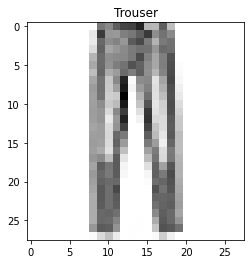

In [43]:
# noinspection PyUnusedLocal
def show(data_: torch.Tensor, idx_: int) -> None:
    r"""

    Parameters
    ----------
    data_:
        The torch tensor for the images.
        SHAPE: [<batch_size>, <num_channels>, <width>, <height>]
    idx_:
        The index/label of the image.

    Returns
    -------
    """
    fig = plt.figure()
    plt.imshow(data_.clone().detach().squeeze().numpy(), cmap='Greys')
    plt.title(idx_to_class[idx_])
    plt.show()

for idx in range(8):
    show(imgs[idx], int(labels[idx]))

In [46]:
# Logging to tensorboard.
writer = tensorboard.SummaryWriter(log_dir='./runs/example-9-tensorboard', comment='example writer')
writer.add_image(img_tensor=make_grid(imgs), tag='example batch of data')
writer.flush()

In [52]:
class Model(nn.Module):
    r"""LeNet basic model.
    """

    #
    def __init__(self):
        r"""The initializer.
        """
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=(5, 5), stride=(1, 1), bias=True
        )
        self.act1 = nn.ReLU()
        self.pool1 = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1), bias=True
        )
        self.act2 = nn.ReLU()
        self.pool2 = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.fc1 = nn.Linear(16*4*4, 120)
        self.act3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.act4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    #
    def forward(self, x):
        r"""Implements the forward pass.

        Parameters
        ----------
        x:
            The input image tensor.
            SHAPE: [<batch_size>, <in_channels=1>, <width=28>, <height=28>].

        Returns
        -------
        out:
            The processed logits tensor.
            SHAPE: [<batch_size>, <out_dim=10>].
        """
        y1 = self.pool1(self.act1(self.conv1(x)))
        y2 = self.pool2(self.act2(self.conv2(y1)))
        y3 = y2.view(y2.shape[0], -1)
        y4 = self.act3(self.fc1(y3))
        y5 = self.act4(self.fc2(y4))
        out = self.fc3(y5)
        return out

In [53]:
model = Model()
print('model:\n{}'.format(model))


model:
Model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (act1): ReLU()
  (pool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (act2): ReLU()
  (pool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (act3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (act4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [54]:
with torch.no_grad():
    imgs, labels = next(iter(train_loader))
    logits = model(imgs)
    print('logits shape: {}'.format(logits.shape))

logits shape: torch.Size([8, 10])
